### "Maximum-Golden-Cookie" Members:
* Maxat Dair
* Kuanysh Kassymbayev
* Altynshash Daniyarova

### Group: BDA-1904

# Topic: Target Prediction
### Regression task

### Content

<font color='black'>
    
*  [Introduction ](#intro)
* [Data description](#data)
* [Outliers Detection](#od)
* [Exploratory Data Analysis (EDA)](#eda)
* [Apply boxcox transformation](#abt)
* [Correlation](#corr)
* [Data Cleaning](#dc)
* [Handling Missing Values](#hmv)
* [Apply Machine Learning Model](#aml)
* [Conclusion](#con)
* [Reference](#ref)

<a id="intro"></a>
## 1. Introduction

Our task is to build a model that will predict value for the variable - Target (numerical), i.e. it is a regression problem. 

Use 'train.csv' file for training your model/models.

Predict the Target variable for the test dataset in 'test.csv' file.

Note that you don't have access to Target variable in the test dataset.

Evaluation of models should be done based on the following metric: MSE - mean squared error.

<a id="data"></a>
## 2. Data description

Dataset:

train.csv - the training set

test.csv - the test set

Data fields:

Id - an anonymous id unique to a (an any) given object
N1, N3, N4, N5, N6 - columns with float64 datatype
N2, C1 - columns with int64 datatype 

Target - prediction column

<a id="pre"></a>
## 3. Data importing

On this stage we import all the necessary libraries and modules.

In [3]:
from keras.optimizers import SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.utils import resample
from sklearn.neighbors import LocalOutlierFactor
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as XGB
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings("ignore")

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'keras'

In [1]:
# Read our datasets
X = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')
y=X.Target
X.head() 

NameError: name 'pd' is not defined

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5000 non-null   int64  
 1   Target  5000 non-null   int64  
 2   N1      5000 non-null   float64
 3   N2      5000 non-null   int64  
 4   N3      5000 non-null   float64
 5   N4      4995 non-null   float64
 6   N5      4995 non-null   float64
 7   N6      4994 non-null   float64
 8   C1      5000 non-null   int64  
 9   C2      5000 non-null   object 
 10  C3      5000 non-null   object 
 11  C4      5000 non-null   object 
 12  C5      5000 non-null   object 
 13  C6      5000 non-null   object 
 14  C7      4999 non-null   object 
 15  C8      4999 non-null   object 
 16  C9      4999 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 664.2+ KB


<a id="pre"></a>
## 4. Outliers Detection

There are many way to detect outlier but here we use z-score for detect outliers. The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured..

In [4]:
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64','float64']]
z = np.abs(stats.zscore(X[numeric_cols]))
threshold = 3
print(np.where(z > 3))

(array([   2,   31,   31,   64,  114,  163,  163,  207,  300,  300,  322,
        322,  353,  353,  393,  393,  393,  398,  403,  403,  447,  537,
        544,  560,  560,  560,  582,  652,  652,  652,  657,  657,  713,
        759,  759,  836,  848,  869,  869,  946,  982,  982, 1030, 1030,
       1030, 1105, 1145, 1145, 1162, 1162, 1162, 1167, 1238, 1292, 1292,
       1299, 1299, 1299, 1303, 1303, 1303, 1310, 1315, 1366, 1372, 1380,
       1380, 1419, 1508, 1525, 1525, 1527, 1547, 1613, 1628, 1628, 1628,
       1646, 1646, 1646, 1647, 1667, 1678, 1678, 1678, 1765, 1765, 1775,
       1775, 1775, 1779, 1779, 1830, 1848, 1851, 1870, 1909, 1909, 1995,
       1995, 1995, 2002, 2008, 2008, 2025, 2036, 2038, 2072, 2072, 2100,
       2174, 2174, 2174, 2179, 2195, 2195, 2195, 2244, 2254, 2254, 2337,
       2365, 2365, 2365, 2367, 2374, 2379, 2379, 2379, 2414, 2414, 2442,
       2442, 2515, 2515, 2550, 2550, 2559, 2568, 2607, 2607, 2682, 2682,
       2696, 2696, 2736, 2736, 2746, 2746, 2775, 2

In [5]:
print(z[31][2])

3.5167925862990774


Here 1st array indicate column and 2nd array indicate row. if we print z[31][2] then output will be 3.51 that's means all value greater then 3.Z>3 consider outliers.

<a id="eda"></a>
## 5.  Exploratory Data Analysis (EDA)

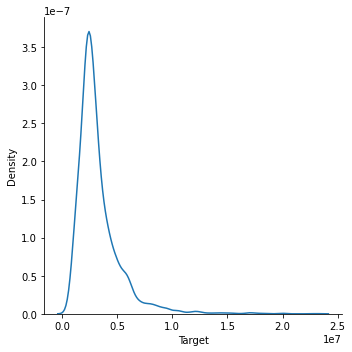

In [6]:
sns.displot(X, x=y, kind="kde")

##### We see that it's positive sekew we must need to fixed it so let's do this using boxcox transformation.

## Feature engineering

<a id="abt"></a>
## 6. Apply boxcox transformation

Box-cox power transformation  is useful as a transformation in modeling problems where homoscedasticity and normality are desired.

Text(0.5, 1.0, 'normalized data')

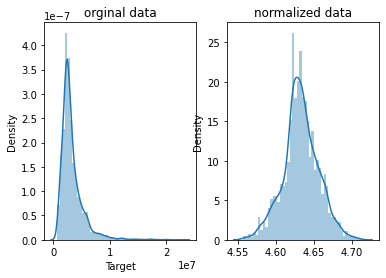

In [7]:
normalized_data=stats.boxcox(y)
fig,ax = plt.subplots(1,2)
sns.distplot(y,ax=ax[0])
ax[0].set_title("orginal data")
sns.distplot(normalized_data[0] , ax=ax[1])
ax[1].set_title("normalized data")

##### Ok now we fixed positive sekew.We normalized the target using boxcox transformation.

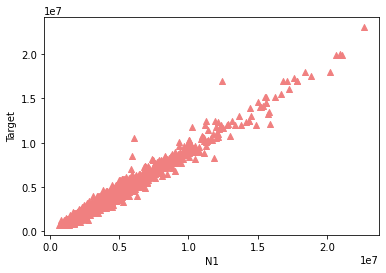

In [8]:
plt.scatter(X.N1, X.Target, c = "lightcoral", marker ="^")
plt.xlabel("N1")
plt.ylabel("Target")
plt.show()

<a id="corr"></a>
## 7. Correlation

In [9]:
X_copy = X.copy()

In [10]:
from sklearn.preprocessing import LabelEncoder
object_cols = [col for col in X_copy.columns if X_copy[col].dtype == "object"]
label_encoder=LabelEncoder()
for col in object_cols:
    X_copy[col]=label_encoder.fit_transform(X_copy[col].astype(str))
X_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5000 non-null   int64  
 1   Target  5000 non-null   int64  
 2   N1      5000 non-null   float64
 3   N2      5000 non-null   int64  
 4   N3      5000 non-null   float64
 5   N4      4995 non-null   float64
 6   N5      4995 non-null   float64
 7   N6      4994 non-null   float64
 8   C1      5000 non-null   int64  
 9   C2      5000 non-null   int32  
 10  C3      5000 non-null   int32  
 11  C4      5000 non-null   int32  
 12  C5      5000 non-null   int32  
 13  C6      5000 non-null   int32  
 14  C7      5000 non-null   int32  
 15  C8      5000 non-null   int32  
 16  C9      5000 non-null   int32  
dtypes: float64(5), int32(8), int64(4)
memory usage: 507.9 KB


##### Here we will show how high correlation features and low correlation features impact on target.

In [11]:
cor=X_copy.corr()
cor['Target'].sort_values(ascending=False)

Target    1.000000
N1        0.987358
N3        0.485878
C1        0.297148
C8        0.188964
C5        0.063002
C9        0.037280
C6        0.037071
N5        0.015338
Id        0.007299
N6        0.000749
N4       -0.015762
C7       -0.030433
C2       -0.223411
C4       -0.275374
C3       -0.368609
N2       -0.446597
Name: Target, dtype: float64

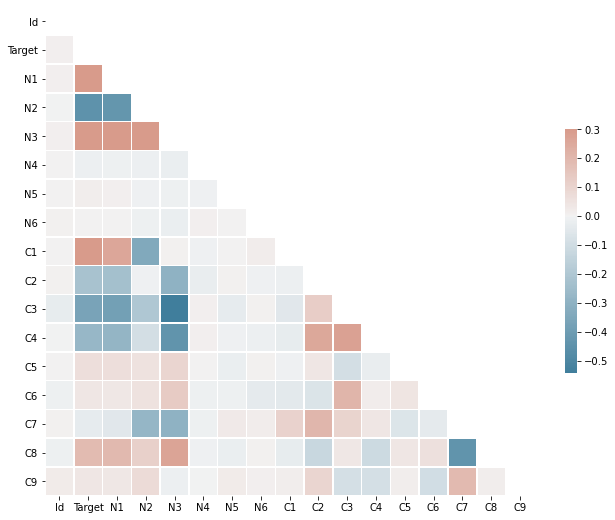

In [12]:
cor=X_copy.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Here we see correlation of all features based on target.

N1 and N3 both are high correlation with each others

C1 and N1 both are high correlation with each others

N3 and C8 both are high correlation with each others

So we will choose for our model: N1,N3,C1,C5,C8,C9

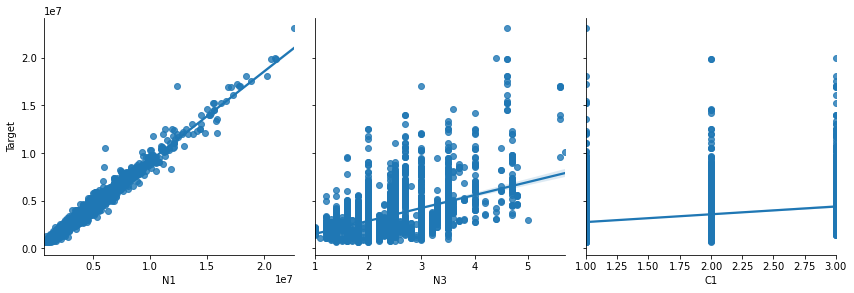

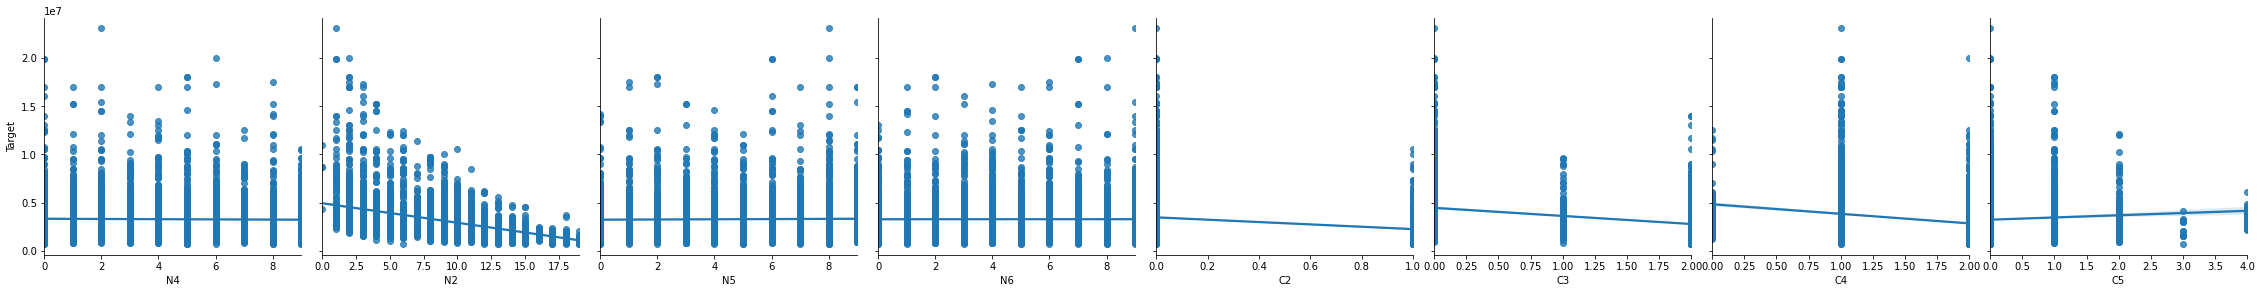

In [13]:
high_cor_feature = sns.PairGrid(X, y_vars=["Target"], x_vars=["N1","N3","C1"], height=4)
high_cor_feature.map(sns.regplot)

low_cor_feature = sns.PairGrid(X_copy, y_vars=["Target"], x_vars=["N4","N2","N5","N6",'C2','C3','C4','C5'], height=4)
low_cor_feature.map(sns.regplot)

High correlation features draw a possitive regression line with target.

Low correlation features draw a negative regression line with target.

<a id="dc"></a>
## 8. Data Cleaning

Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database

#### Drop Target
Here we drop target variable and add train and test data so that it will be easy for clean.

In [14]:
test_id = test['Id']
total_data = pd.concat([X, test], axis=0, sort=False)
total_data = total_data.drop(['Id', 'Target','N2','N4','N5','N6','C2','C3','C4','C6','C7','C9'], axis=1)

<a id="hmv"></a>
## 9. Handling Missing Values
Here we count missing value and percentage for each column.

In [15]:
missing_values_count = total_data.isnull().sum().sort_values(ascending=False)
percent= (total_data.isnull().sum() / total_data.isnull().count().sort_values(ascending=False)*100)
missing_data = pd.concat([missing_values_count,percent], axis=1, keys=['missing', 'percent'])
missing_data.head(30)

,missing,percent
C8,1,0.016667
C5,0,0.000000
C1,0,0.000000
N3,0,0.000000
N1,0,0.000000


In [16]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N1      6000 non-null   float64
 1   N3      6000 non-null   float64
 2   C1      6000 non-null   int64  
 3   C5      6000 non-null   object 
 4   C8      5999 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 281.2+ KB


## Back to Feature Engineering

#### Apply Label Encoder Method
We use it for transforming categorical vabiables.

In [17]:
from sklearn.preprocessing import LabelEncoder
object_cols = [col for col in total_data.columns if total_data[col].dtype == "object"]
label_encoder=LabelEncoder()
for col in object_cols:
    total_data[col]=label_encoder.fit_transform(total_data[col].astype(str))
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N1      6000 non-null   float64
 1   N3      6000 non-null   float64
 2   C1      6000 non-null   int64  
 3   C5      6000 non-null   int32  
 4   C8      6000 non-null   int32  
dtypes: float64(2), int32(2), int64(1)
memory usage: 234.4 KB


#### Apply Simple Imputer Method
Simple imputer method used for handle numerical variable.

In [18]:
from sklearn.impute import SimpleImputer
numeric_cols = [col for col in total_data.columns if total_data[col].dtype in ['int64','float64']]
my_imputer=SimpleImputer(strategy='median')
data = pd.DataFrame(my_imputer.fit_transform(total_data))
data.columns = total_data.columns
a=data.isnull().sum().sort_values(ascending=False)
a.head(10)

C8    0
C5    0
C1    0
N3    0
N1    0
dtype: int64

#### Fix The Skewness of Features

In [19]:
skewed_feats = data[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
for feature in skewed_feats.index:
    data[feature] = np.log1p(data[feature])

In [20]:
cor=data.corr()
cor['N1'].sort_values(ascending=False)

N1    1.000000
N3    0.469725
C1    0.275045
C8    0.205714
C5    0.071930
Name: N1, dtype: float64

In [21]:
data.describe()

,N1,N3,C1,C5,C8
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,15.000799,1.171850,0.935960,0.204167,17.531167
std,0.473068,0.206459,0.263785,0.546991,6.758326
min,13.339068,0.693147,0.693147,0.000000,0.000000
25%,14.728982,0.955511,0.693147,0.000000,13.000000
50%,14.966085,1.223775,0.693147,0.000000,18.000000
75%,15.273650,1.308333,1.098612,0.000000,23.000000
max,16.936325,1.902108,1.386294,4.000000,29.000000


#### Separate Train and Test After Clean

In [22]:
x_train =data[:len(y)]
x_test = data[len(y):]
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N1      5000 non-null   float64
 1   N3      5000 non-null   float64
 2   C1      5000 non-null   float64
 3   C5      5000 non-null   float64
 4   C8      5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 5000 to 5999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N1      1000 non-null   float64
 1   N3      1000 non-null   float64
 2   C1      1000 non-null   float64
 3   C5      1000 non-null   float64
 4   C8      1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


<a id="aml"></a>
## 10. Apply Machine Learning Model

#### Apply XGBOOST Algorithm

In [23]:
model =XGB.XGBRegressor(n_estimators=2000, learning_rate=0.05, n_jobs=4)
model.fit(x_train, y)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
x_test

,N1,N3,C1,C5,C8
5000,14.855098,1.029619,0.693147,0.0,25.0
5001,14.868526,0.955511,1.098612,0.0,6.0
5002,15.345957,1.098612,1.098612,0.0,17.0
5003,15.039286,1.252763,0.693147,0.0,11.0
5004,15.137760,1.504077,0.693147,0.0,23.0
...,...,...,...,...,...
5995,15.092756,1.223775,0.693147,0.0,13.0
5996,13.987117,0.955511,0.693147,0.0,25.0
5997,14.982128,1.223775,1.386294,1.0,23.0
5998,15.069667,1.252763,0.693147,0.0,1.0


#### Predict Test

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
predictions2 = model.predict(x_train)

In [27]:
print(mean_squared_error(y, predictions2))

8830117117.045929


In [28]:
predictions = model.predict(x_test)

#### Submit Result at Kaggle Competion

In [29]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['Target'] = predictions
sub.to_csv('submission.csv',index=False)
sub.head(10)

,Id,Target
0,20000,2499529.25
1,20001,2525409.75
2,20002,3976347.75
3,20003,2888328.50
4,20004,3208753.25
5,20005,3837052.25
6,20006,2814695.00
7,20007,1562774.50
8,20008,1363555.75
9,20009,2149225.00


<a id="con"></a>
## 11. Conclusion
To conclude our work, we would share that the MSE result is equal to 8830117117.045929. 

<a id="ref"></a>
## 12. Reference
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html